Este codigo foi feito por MANSOUR, H. I. Face Recognition using Eigenfaces (Python) - Hassan Id Mansour. Disponível em: <https://hassan-id-mansour.medium.com/face-recognition-using-eigenfaces-python-b857b2599ed0>. Acesso em: 15 maio. 2025.


link para o meu video: https://youtu.be/eYDV1hs3evQ


In [1]:
import cv2
import math
import numpy as np
import  pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

In [5]:
def showImgs(imgs, n_imgs, i_imgs):
   n = sqrt(n_imgs)
   m = n
   p = 1
   if n != int(n):
      n = int(n)
      m = n + 1
   print("n, m", n, m)
   fig = plt.figure()
   for i in i_imgs:
      fig.add_subplot(int(n), int(m), p)
      plt.imshow(imgs[i], cmap='gray')
      plt.axis('off')
      p += 1
plt.show()

In [6]:
faces = fetch_olivetti_faces()
images = faces.images
images.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\carol\scikit_learn_data


(400, 64, 64)

n, m 10.0 10.0


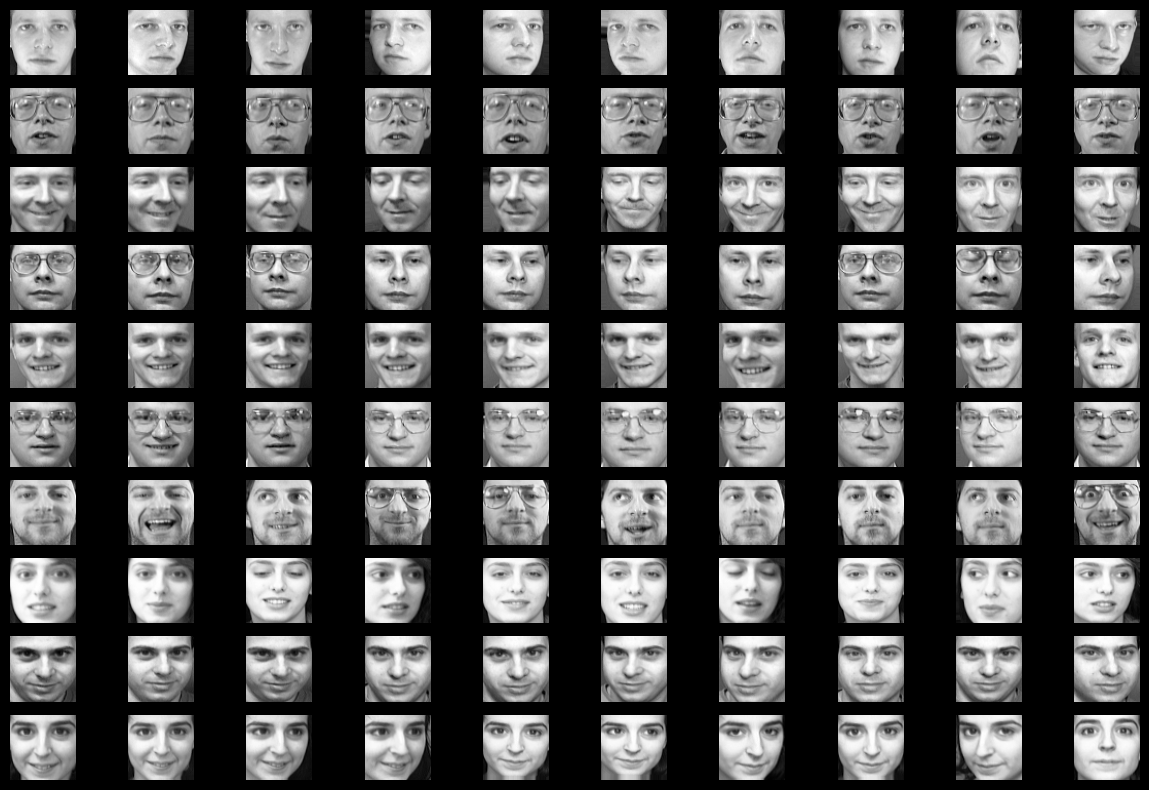

In [8]:
features = faces.data  # features
targets = faces.target # targets
showImgs(images, 100, range(100))


the target of this face is : 7
n, m 1.0 1.0


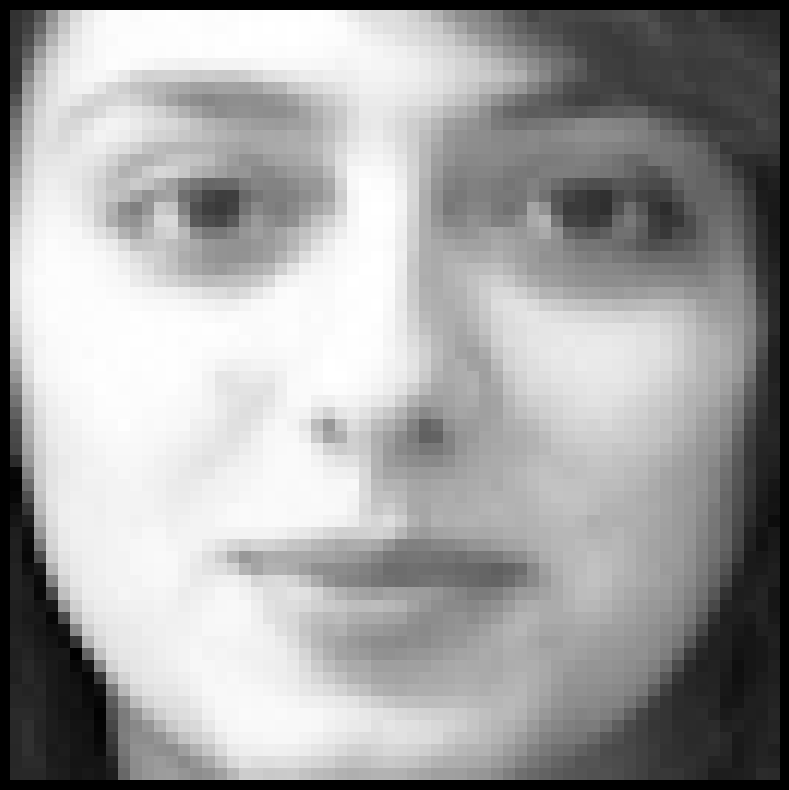

In [9]:
query_img1 = images[71]
print('the target of this face is :', targets[71])
showImgs([query_img1], 1, [0])

n, m 3 4


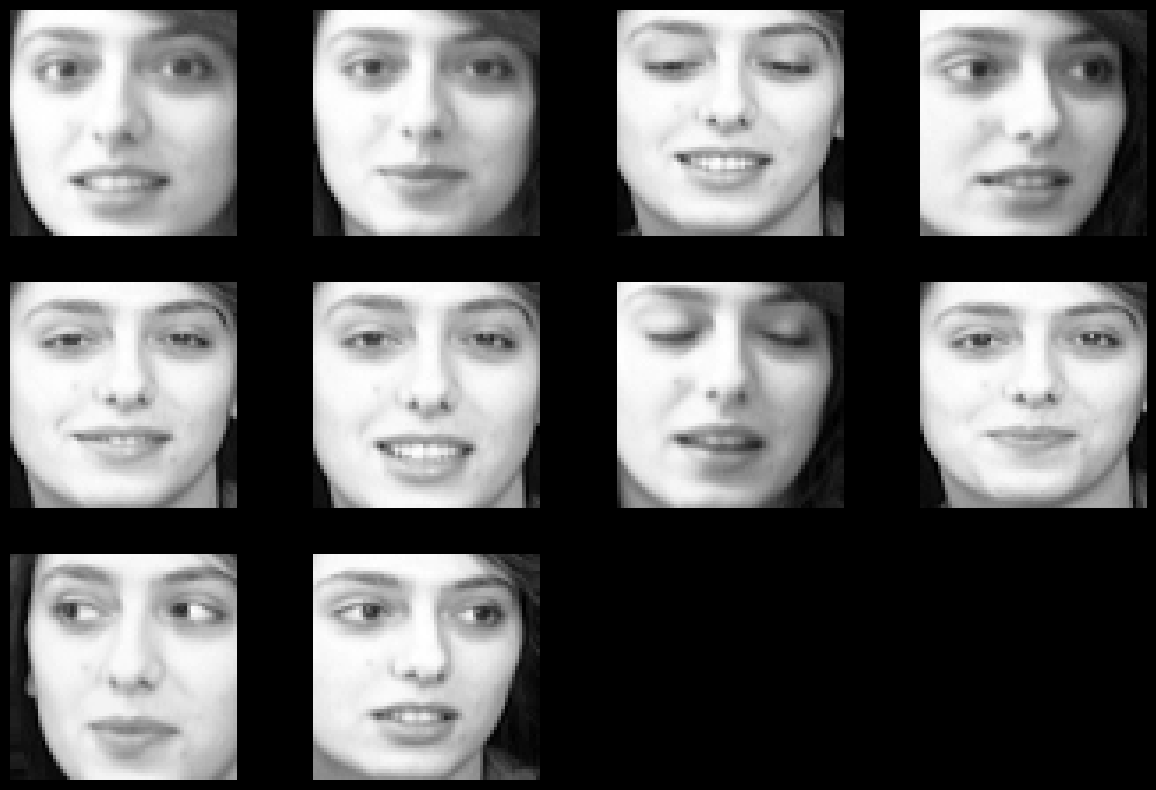

In [10]:
showImgs(images, 10, range(70, 80))

n, m 1.0 1.0


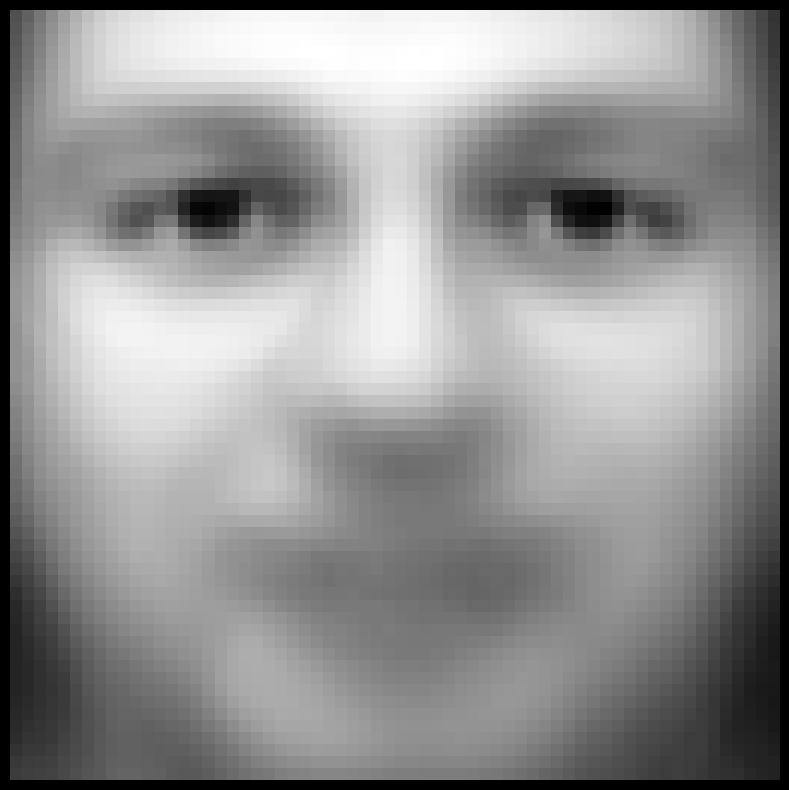

In [11]:
query_γ1 = query_img1.reshape(-1)
Γ = np.array([I.reshape(-1) for I in images])
Σ_Γi = np.zeros(4096)
for Γi in Γ:
   Σ_Γi += Γi
   Ψ = (1/400)* Σ_Γi
showImgs([Ψ.reshape(64,64)], 1, [0])

In [12]:
φ1 = query_γ1 - Ψ
Φ = np.array([I - Ψ for I in Γ])
Φ.shape

(400, 4096)

In [13]:
# Using the PCA algorithm
pca = PCA(svd_solver='full')
pca.fit(Φ)


PCA(svd_solver='full')

In [14]:
pca.components_.shape

(400, 4096)

In [15]:
images.shape

(400, 64, 64)

n, m 6 7


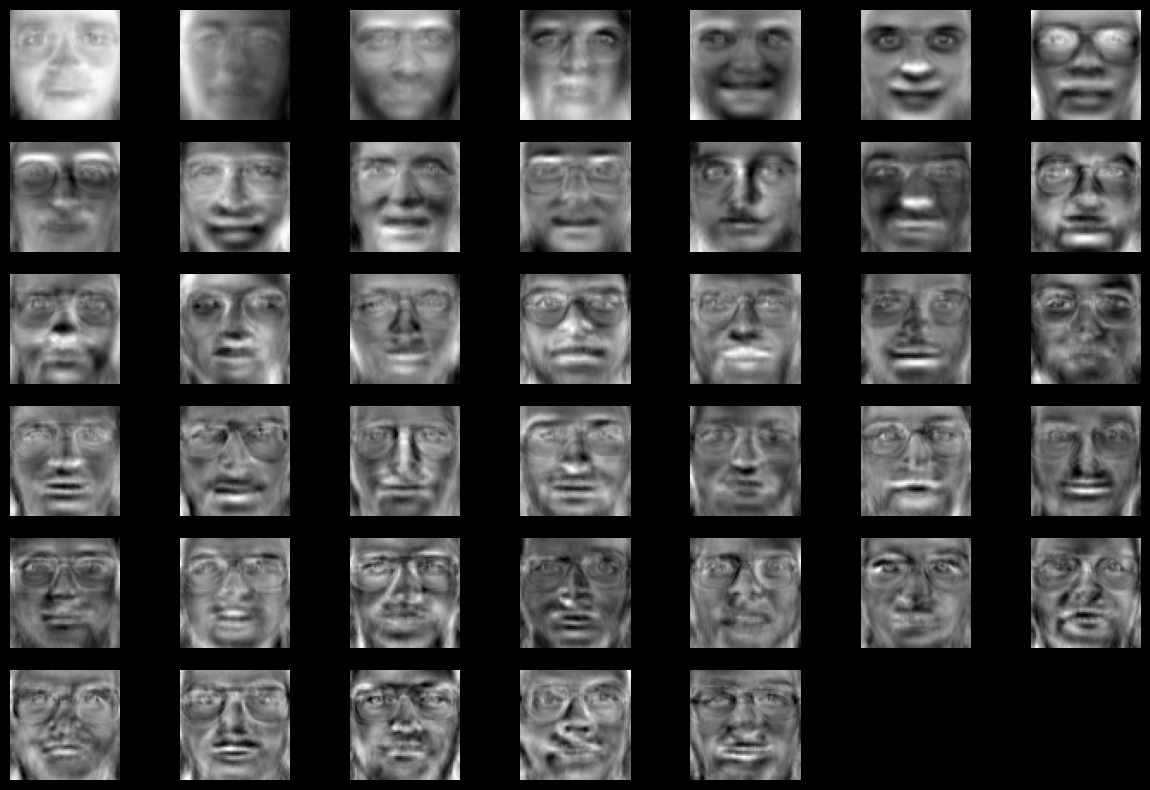

In [16]:
# These lines just for showing the images in (64, 64)format
best_eigenfaces = []
for eigenface in pca.components_[0 : 40]:
   best_eigenfaces.append(eigenface.reshape(64, 64))
showImgs(best_eigenfaces, 40, range(40))

In [17]:
best_eigenfaces = pca.components_[0 : 40]
best_eigenfaces.shape

(40, 4096)

In [18]:
weights = []
for i in range(0, 400):
   weight = []
   for j in range(0, 40):
      w = best_eigenfaces[j] @ Φ[i]
      weight.append(w)
   weights.append(weight)
weights = np.transpose(weights)
weights.shape

(40, 400)

In [19]:
weight1 = best_eigenfaces @ φ1.T
list_dist1 = np.linalg.norm(weights - weight1.reshape(-1, 1), axis = 0)
df1 = pd.DataFrame(list_dist1, columns=['euc dist'])
df1 = df1.sort_values(by=['euc dist'])
df1.head()

,euc dist
71,1.496945e-14
70,5.160444e+00
74,7.847955e+00
77,7.982046e+00
76,8.085825e+00


In [20]:
df1.index[0:49]

Index([ 71,  70,  74,  77,  76,  72,  79,  91,  75, 184,  34, 109, 373, 188,
       319, 234,   4, 100, 377,  39, 265,  99, 187,  90, 269, 317, 318, 183,
       106,   2, 131,  96, 105, 248, 263, 221, 262,  29,  33, 125, 103, 132,
        95, 376, 178,   0, 186,  73, 156],
      dtype='int64')

n, m 7.0 7.0


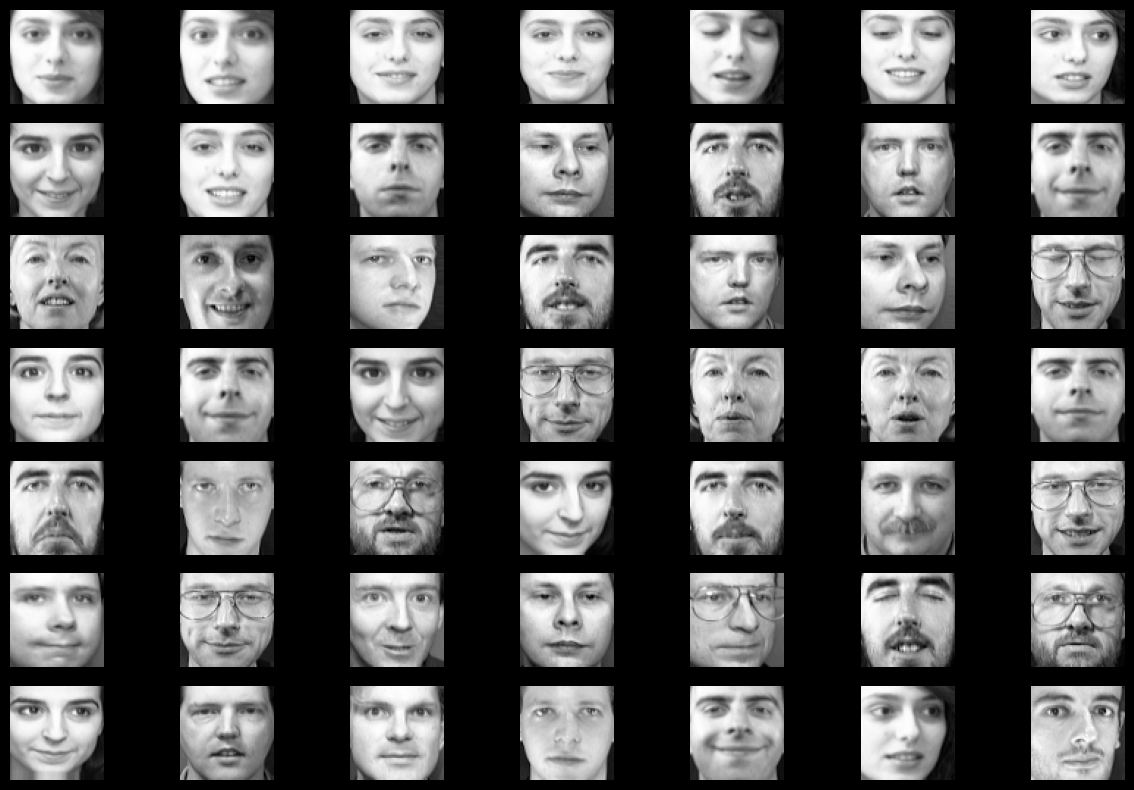

In [21]:
showImgs(images, 49, df1.index[0 : 49])